In [25]:
import pandas as pd
from models import fold_split
from utils import word_utils
from utils import eda_utils
from utils import data_utils
import imp
imp.reload(word_utils)
imp.reload(eda_utils)
imp.reload(data_utils)

/home/ginger/Projects/Contest/kesci_question_multilabel_classification


<module 'utils.data_utils' from '/home/ginger/Projects/Contest/kesci_question_multilabel_classification/utils/data_utils.py'>

In [26]:
slicer = fold_split.ShuffleSlicer()

In [27]:
data_df = pd.read_csv("./data/train.csv")
data_df.head()

,ID,category_A,category_B,category_C,category_D,category_E,category_F,Question Sentence
0,QC0000000001,0,1,0,0,0,0,病情描述：病人是典型的“三高”，想吃拜阿司匹林做为预防用药，但是出现过敏症状。曾经治疗情况和...
1,QC0000000002,0,1,0,0,0,0,"病情描述：我父亲78岁,小脑梗塞，表现左眼双视，经住院输液治疗现在恢复一月余，现在看人不重影..."
2,QC0000000003,0,1,0,0,0,0,病情描述：医生您好！我想问一下，我妈脑梗塞今天住院十一天了，情况好转，可以下床活动和清楚表达...
3,QC0000000004,1,0,0,0,0,0,停药反跳的血压是身体真实状况吗?
4,QC0000000005,0,1,0,0,0,0,病情描述：医生：银杏叶片生产厂很多，价格差别很大，应怎样选择？曾经治疗情况和效果：头部紧束感...


In [28]:
data_df[data_df["category_E"]==1]

,ID,category_A,category_B,category_C,category_D,category_E,category_F,Question Sentence
12,QC0000000013,1,1,0,0,1,0,病情描述：我42岁，男性，身高：1.82；体重：92公斤；吸烟；七月体检胸透:主动脉结钙化，...
14,QC0000000015,0,1,0,0,1,0,病情描述：我母亲是高血压，我最近老头晕，查血压120、80.血常规也正常，是不是我血压有点高...
16,QC0000000017,1,1,0,0,1,0,病情描述：测量血压每天测量好，还是几天测量一次好呢？一般在一天的什么时间测量比较准确啊。即使...
17,QC0000000018,0,0,0,0,1,0,病情描述：早上空腹量血压130100想得到怎样的帮助：应该注意什么？
23,QC0000000024,1,0,0,0,1,0,病情描述：血压突然升高？想得到怎样的帮助： 我现在还是一名没毕业的大学生呢，这段时间正在为考...
...,...,...,...,...,...,...,...,...
4964,QC1000002965,0,0,0,1,1,0,倪医生您好！我父亲今年40多岁，平时应酬喝酒抽烟都很厉害，同时也缺乏锻炼。饮食生活都无规律。...
4975,QC1000002976,0,1,0,0,1,0,我父亲二年前做了心脏介入手术，除了平时坚持药物治疗外，请问专家发生什么情况一定要到医院！因为...
4984,QC1000002985,0,0,0,0,1,0,请问隐匿性心脏病该注意的饮食问题有哪些?
4986,QC1000002987,1,0,0,1,1,0,心肌梗塞！！很想知道心动过缓的患者有患心肌梗塞的危险么？有什么典型症状么？这样的老人应该怎样...


In [29]:
# 6类，组合
2**6

64

['Question Sentence', 'ID']
['category_A', 'category_C', 'category_F', 'category_B', 'category_D', 'category_E']


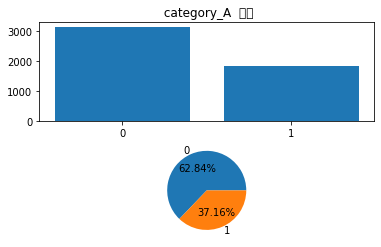

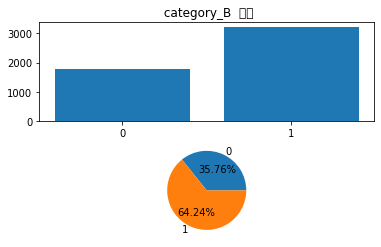

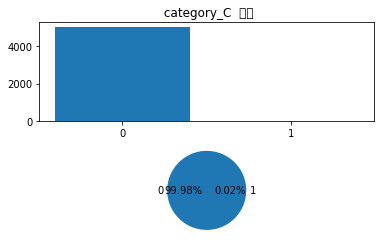

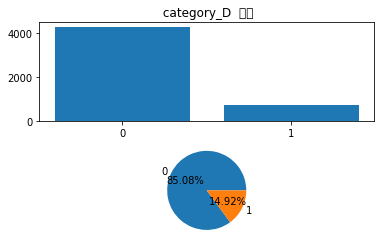

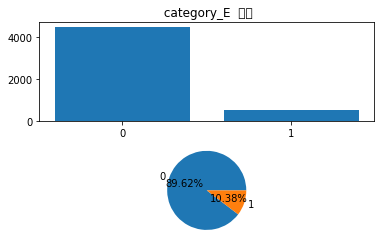

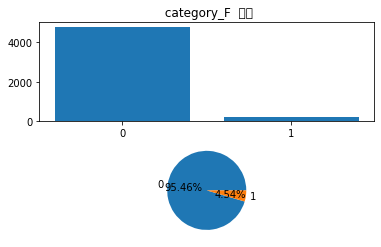

In [30]:
from utils.eda_utils import EDA
label_col, num_col = EDA.get_col_type(data_df)
EDA.eda_plot(data_df, label_col, num_col)

In [19]:
data_df["CutSentence"] = data_df["Question Sentence"].apply(utils.chinese_word_cut)
data_df.head()

,ID,category_A,category_B,category_C,category_D,category_E,category_F,Question Sentence,CutSentence
0,QC0000000001,0,1,0,0,0,0,病情描述：病人是典型的“三高”，想吃拜阿司匹林做为预防用药，但是出现过敏症状。曾经治疗情况和...,病情 描述 ： 病人 是 典型 的 “ 三高 ” ， 想 吃 拜 阿司匹林 做 为 预防 用...
1,QC0000000002,0,1,0,0,0,0,"病情描述：我父亲78岁,小脑梗塞，表现左眼双视，经住院输液治疗现在恢复一月余，现在看人不重影...","病情 描述 ： 我 父亲 78 岁 , 小 脑梗塞 ， 表现 左眼 双视 ， 经 住院 输液..."
2,QC0000000003,0,1,0,0,0,0,病情描述：医生您好！我想问一下，我妈脑梗塞今天住院十一天了，情况好转，可以下床活动和清楚表达...,病情 描述 ： 医生 您好 ！ 我 想 问 一下 ， 我妈 脑梗塞 今天 住院 十一天 了 ...
3,QC0000000004,1,0,0,0,0,0,停药反跳的血压是身体真实状况吗?,停药 反跳 的 血压 是 身体 真实 状况 吗 ?
4,QC0000000005,0,1,0,0,0,0,病情描述：医生：银杏叶片生产厂很多，价格差别很大，应怎样选择？曾经治疗情况和效果：头部紧束感...,病情 描述 ： 医生 ： 银杏 叶片 生产厂 很多 ， 价格 差别 很大 ， 应 怎样 选择...


In [31]:

# data_df['label'] = data_df[data_df.columns[1:7]].apply(lambda x: ','.join(str(x.value)),axis=1)  
# data_df['label'].to_list()
data_df['label'] = data_df.apply(lambda row: data_utils.hebin_cols(row['category_A'], row['category_B'], row['category_C'], row['category_D'], row['category_E'], row['category_F'],), axis=1)
data_df

,ID,category_A,category_B,category_C,category_D,category_E,category_F,Question Sentence,label
0,QC0000000001,0,1,0,0,0,0,病情描述：病人是典型的“三高”，想吃拜阿司匹林做为预防用药，但是出现过敏症状。曾经治疗情况和...,[2]
1,QC0000000002,0,1,0,0,0,0,"病情描述：我父亲78岁,小脑梗塞，表现左眼双视，经住院输液治疗现在恢复一月余，现在看人不重影...",[2]
2,QC0000000003,0,1,0,0,0,0,病情描述：医生您好！我想问一下，我妈脑梗塞今天住院十一天了，情况好转，可以下床活动和清楚表达...,[2]
3,QC0000000004,1,0,0,0,0,0,停药反跳的血压是身体真实状况吗?,[1]
4,QC0000000005,0,1,0,0,0,0,病情描述：医生：银杏叶片生产厂很多，价格差别很大，应怎样选择？曾经治疗情况和效果：头部紧束感...,[2]
...,...,...,...,...,...,...,...,...,...
4995,QC1000002996,1,1,0,0,0,0,"腰痛 该咋办?女,28岁,经常睡到下夜4-5点就腰痛,起床后不痛,到医院检查b超,没有发现异...","[1, 2]"
4996,QC1000002997,0,1,0,0,0,0,"请问!右股关节缺血坏死!怎么样治疗比较好~~~!!!我今年48岁,关节疼痛好几年了,由于平常...",[2]
4997,QC1000002998,1,0,0,1,1,0,咨询：钱医生您好，请问这是膝关节炎吗？钱医生：您好！我妈妈（48岁）这几年开始膝关节一直酸，...,"[1, 4, 5]"
4998,QC1000002999,0,0,0,0,0,1,"??主任医生你好!本人应左膝盖的半月板损伤!前几天去过你们医院看过,您介意开刀.由于我自己这...",[6]


In [32]:
data_df['labelstr'] = data_df.apply(lambda row: data_utils.hebin2str(row['category_A'], row['category_B'], row['category_C'], row['category_D'], row['category_E'], row['category_F'],), axis=1)
data_df

,ID,category_A,category_B,category_C,category_D,category_E,category_F,Question Sentence,label,labelstr
0,QC0000000001,0,1,0,0,0,0,病情描述：病人是典型的“三高”，想吃拜阿司匹林做为预防用药，但是出现过敏症状。曾经治疗情况和...,[2],0-1-0-0-0-0
1,QC0000000002,0,1,0,0,0,0,"病情描述：我父亲78岁,小脑梗塞，表现左眼双视，经住院输液治疗现在恢复一月余，现在看人不重影...",[2],0-1-0-0-0-0
2,QC0000000003,0,1,0,0,0,0,病情描述：医生您好！我想问一下，我妈脑梗塞今天住院十一天了，情况好转，可以下床活动和清楚表达...,[2],0-1-0-0-0-0
3,QC0000000004,1,0,0,0,0,0,停药反跳的血压是身体真实状况吗?,[1],1-0-0-0-0-0
4,QC0000000005,0,1,0,0,0,0,病情描述：医生：银杏叶片生产厂很多，价格差别很大，应怎样选择？曾经治疗情况和效果：头部紧束感...,[2],0-1-0-0-0-0
...,...,...,...,...,...,...,...,...,...,...
4995,QC1000002996,1,1,0,0,0,0,"腰痛 该咋办?女,28岁,经常睡到下夜4-5点就腰痛,起床后不痛,到医院检查b超,没有发现异...","[1, 2]",1-1-0-0-0-0
4996,QC1000002997,0,1,0,0,0,0,"请问!右股关节缺血坏死!怎么样治疗比较好~~~!!!我今年48岁,关节疼痛好几年了,由于平常...",[2],0-1-0-0-0-0
4997,QC1000002998,1,0,0,1,1,0,咨询：钱医生您好，请问这是膝关节炎吗？钱医生：您好！我妈妈（48岁）这几年开始膝关节一直酸，...,"[1, 4, 5]",1-0-0-1-1-0
4998,QC1000002999,0,0,0,0,0,1,"??主任医生你好!本人应左膝盖的半月板损伤!前几天去过你们医院看过,您介意开刀.由于我自己这...",[6],0-0-0-0-0-1


In [46]:
# data_df[data_df["category_A"]==0 & data_df["category_B"]==0 & data_df["category_C"]==0 & data_df["category_D"]==0 & data_df["category_E"]==0 & data_df["category_F"]==0]
data_df[data_df["labelstr"]=="0-0-0-0-0-0"].iloc[4]["Question Sentence"]

'病情描述：大夫，高血压患者带钢手镯好吗，18岁，女'

In [33]:

data_df.groupby("labelstr").count()

,ID,category_A,category_B,category_C,category_D,category_E,category_F,Question Sentence,label
labelstr,,,,,,,,,
0-0-0-0-0-0,39,39,39,39,39,39,39,39,39
0-0-0-0-0-1,99,99,99,99,99,99,99,99,99
0-0-0-0-1-0,261,261,261,261,261,261,261,261,261
0-0-0-0-1-1,4,4,4,4,4,4,4,4,4
0-0-0-1-0-0,278,278,278,278,278,278,278,278,278
0-0-0-1-0-1,4,4,4,4,4,4,4,4,4
0-0-0-1-1-0,35,35,35,35,35,35,35,35,35
0-0-0-1-1-1,1,1,1,1,1,1,1,1,1
0-0-1-0-0-0,1,1,1,1,1,1,1,1,1


In [55]:
# X_train, X_test, y_train, y_test = slicer.split(data_df, fea_col_name="CutSentence", label_col_name="label")
# y_train

In [56]:
 train_df, test_df = slicer.split(data_df)

In [57]:
from sklearn.feature_extraction.text import  CountVectorizer
vect=CountVectorizer()  # 实例化
vect.fit_transform(train_df["CutSentence"])

<3000x14391 sparse matrix of type '<class 'numpy.int64'>'
	with 89891 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
clf = OneVsRestClassifier(SVC(probability=True))

In [59]:
from sklearn.pipeline import make_pipeline # 导入make_pipeline方法
pipe=make_pipeline(vect,clf)
pipe.steps #  查看pipeline的步骤（与pipeline相似）

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('onevsrestclassifier',
  OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma='scale', kernel='rbf', max_iter=-1,
                                    probability=True, random_state=None,
                                    shrinking=True, tol=0.001, verbose=False),
                      n_jobs=None))]

In [60]:
# train_df["label"].to_list()

In [63]:
mlb.transform(np.array(data_df["label"]))

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0]])

In [61]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(np.array(train_df["label"]))
y_test = mlb.transform(np.array(test_df["label"]))
y_train

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [64]:
pipe.fit(train_df["CutSentence"], y_train)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False,
                                                   cache_size=200,
                                                   class_weight=None, coef0=0.0,
                                                   decision_

In [65]:
y_pred = pipe.predict(test_df["CutSentence"]) 
y_pred

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [66]:
y_test

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0]])

In [67]:
my_metrics = metrics.classification_report(y_test, y_pred)
print(my_metrics)

precision    recall  f1-score   support

           0       0.79      0.46      0.58       743
           1       0.74      0.91      0.82      1256
           2       0.00      0.00      0.00         0
           3       1.00      0.00      0.01       307
           4       0.89      0.15      0.26       218
           5       0.00      0.00      0.00        96

   micro avg       0.76      0.58      0.66      2620
   macro avg       0.57      0.25      0.28      2620
weighted avg       0.77      0.58      0.58      2620
 samples avg       0.69      0.61      0.63      2620



In [52]:
clf = OneVsRestClassifier(SVC(probability=True))
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)
my_metrics = metrics.classification_report(y_test, predictions)
print(my_metrics)

ValueError: could not convert string to float: '病情 描述 ： 目前 无 任何 不适 表情 血压 150 / 80mmHg'

In [3]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X, y = iris.data, iris.target
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
#划分训练集和测试集
X = data.drop(['status'], axis=1)
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np


x = np.array([[1,2,3],[3,3,2],[8,8,7],[3,7,1],[4,5,6]])
y = [['bar','foo'],['bar'],['foo'],['foo','jump'],['bar','fox','jump']]

mlb = MultiLabelBinarizer()
y_enc = mlb.fit_transform(y)

y_enc

array([[1, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 1]])

In [11]:
train_x, test_x, train_y, test_y = train_test_split(x, y_enc, test_size=0.33)

clf = OneVsRestClassifier(SVC(probability=True))
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)
print(predictions)
my_metrics = metrics.classification_report( test_y, predictions)
print(my_metrics)

[[0 1 0 1]
 [0 1 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.25      0.33      0.29         3
   macro avg       0.12      0.25      0.17         3
weighted avg       0.17      0.33      0.22         3
 samples avg       0.25      0.25      0.25         3

